## A Guided Exploration of UN Data (Gross Domestic Product and Internet Usage)


1. Importing Data

    a. Create a `data` folder in your local project repository.  
    b. Download these two CSV files and place them in the data folder:

            i.	Gross Domestic Product (GDP) per capita http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD
               **DO NOT APPLY ANY FILTERS**
             - rename the file to `gdp_percapita.csv`
             - open it with a text editor (**not excel**) and take a look

            ii.	Percentage of Individuals using the Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H
               **DO NOT APPLY ANY FILTERS**
             - rename the file to `internet_use.csv`
             - open it with a text editor (**not excel**) and take a look

2.	Create a `notebooks` folder and launch a Jupyter Notebook in this folder. Give it a meaningful name.      
 - **IMPORTANT:**  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.    
  - Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from `Code` to `Markdown`.

3.	Import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.


In [4]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

5. How many rows and columns are in `gdp_df`? What are the data types of each column?


In [6]:
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]


In [7]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [9]:
gdp_df = gdp_df.drop("Value Footnotes", axis=1)

In [10]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [11]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 


In [106]:
country_year_counts = gdp_df.groupby('Country')['Year'].nunique()

total_years = gdp_df['Year'].nunique()

countries_with_all_years = country_year_counts[country_year_counts == total_years]

print(countries_with_all_years.count())

202


In [118]:
countries_without_all_years = country_year_counts[country_year_counts <= (total_years - 3)]
print(countries_without_all_years)
#Returns a list of all countries that do not have data for at least 3 of the years.

Country
Afghanistan                  20
Bosnia and Herzegovina       29
Cambodia                     30
Cayman Islands               16
Croatia                      28
CuraÃ§ao                     22
Djibouti                     10
Estonia                      28
Iceland                      28
Israel                       28
Kosovo                       15
Latvia                       28
Liberia                      23
Libya                        24
Lithuania                    28
Maldives                     28
Moldova                      28
Montenegro                   26
Nauru                        19
Other small states           23
Palau                        22
Qatar                        23
San Marino                   25
Serbia                       28
Sint Maarten (Dutch part)    14
Slovenia                     28
Small states                 26
Somalia                      10
SÃ£o TomÃ© and Principe      22
Timor-Leste                  23
Turks and Caicos Islands     12


In [15]:
total_years_count = gdp_df['Year'].value_counts().sort_index()
print(total_years_count)
#returns a count of observations for every year

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: count, dtype: int64


Answer: After looking at the observations per year, I have noticed that observations have consistently increased throughout the years with a slight dip in 2021 and a noticable dip in 2022. 

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

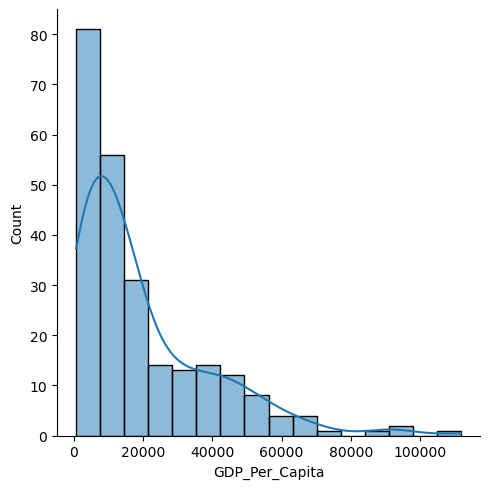

In [123]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
sns.displot( data=gdp_2020["GDP_Per_Capita"], kde=True )

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

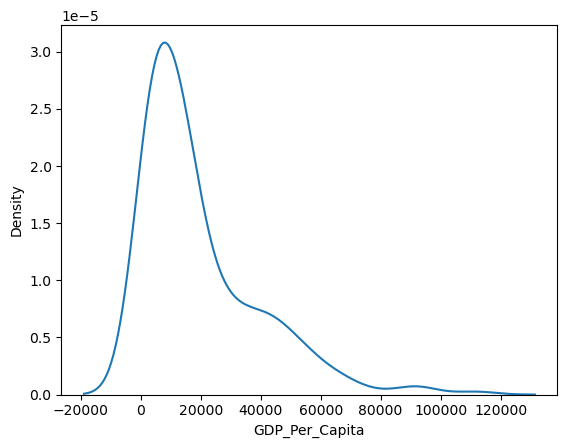

In [86]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

In [ ]:
sns.boxplot( x=df["species"], y=gdp_2020["GDP_Per_Capita"] )

9. What was the median GDP per capita value in 2020?


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


11. Which country was the first to have a GDP per capita greater than $100,000?


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.


13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?


14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.
